In [1]:
import numpy as np
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
import pickle
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
ps = PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz,DecisionTreeRegressor,DecisionTreeClassifier
from sklearn import tree
import math
from collections import Counter
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
1975,ham,Delhi and chennai still silent.
5523,ham,Going to join tomorrow.
4533,ham,I have no money 4 steve mate! !
3059,ham,K..k...from tomorrow onwards started ah?
3973,ham,Roger that. WeÛ÷re probably going to rem in a...


In [8]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2955,ham,Yes there were many sweets
3123,ham,My uncles in Atlanta. Wish you guys a great se...
3993,ham,I love to cuddle! I want to hold you in my str...
1540,ham,K come to nordstrom when you're done
5370,spam,dating:i have had two of these. Only started a...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

403

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## 2.EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

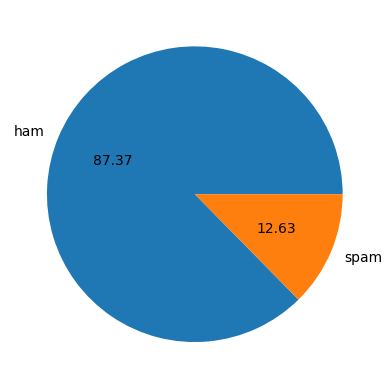

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
# Data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

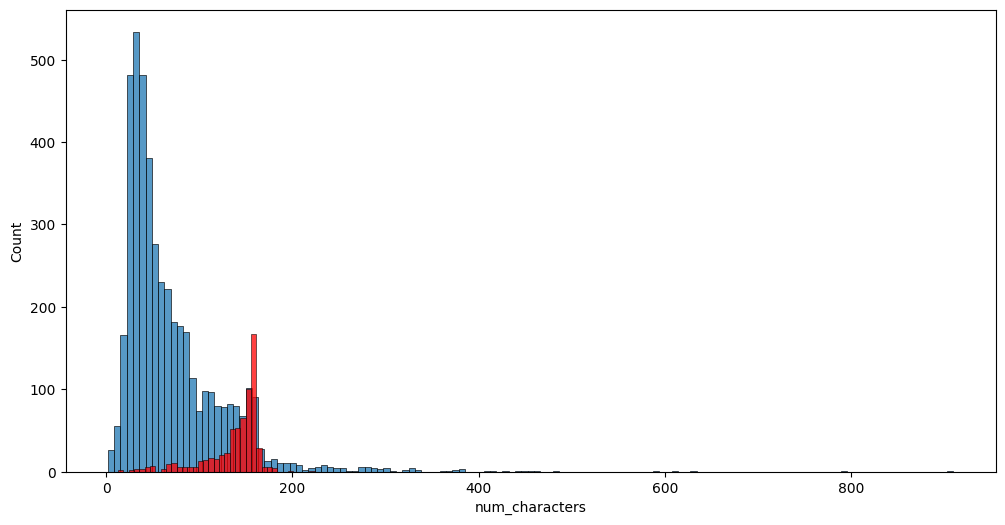

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

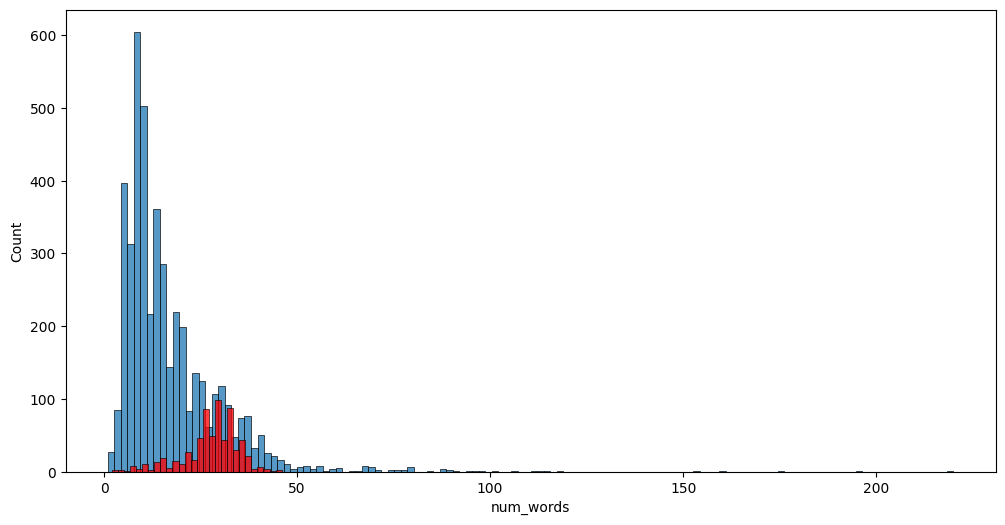

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

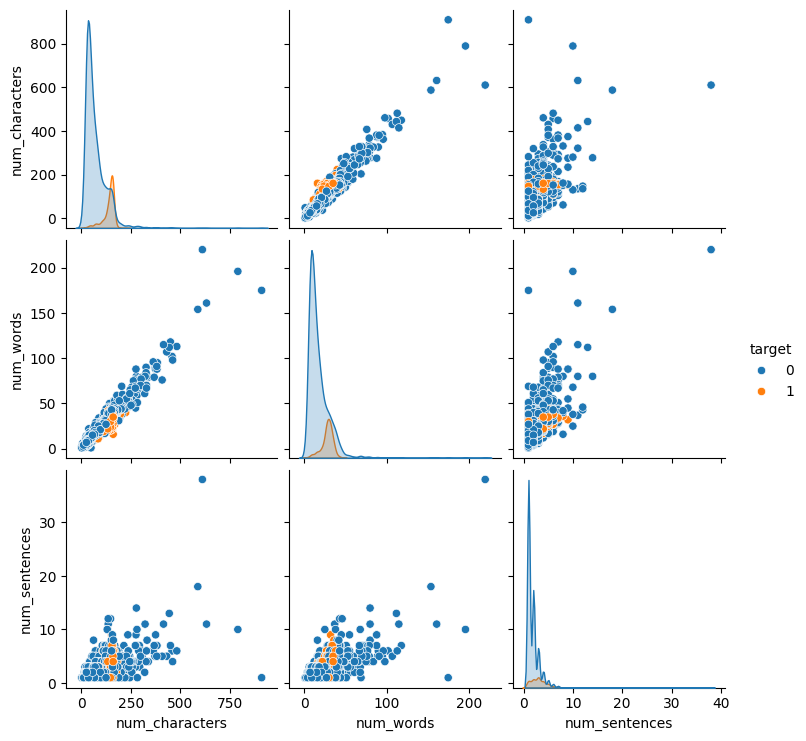

In [34]:
sns.pairplot(df,hue='target')

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


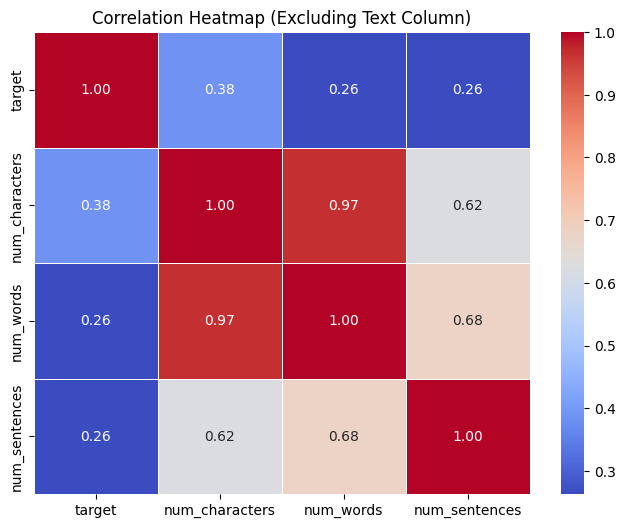

In [36]:
df_numeric = df.drop(columns=['text'])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap (Excluding Text Column)')
plt.show()

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [38]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [39]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

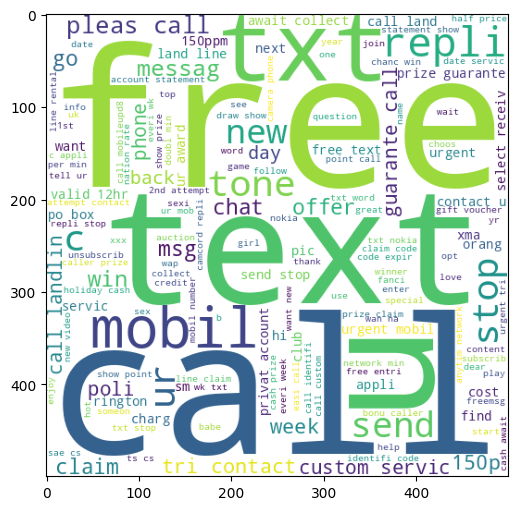

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [46]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

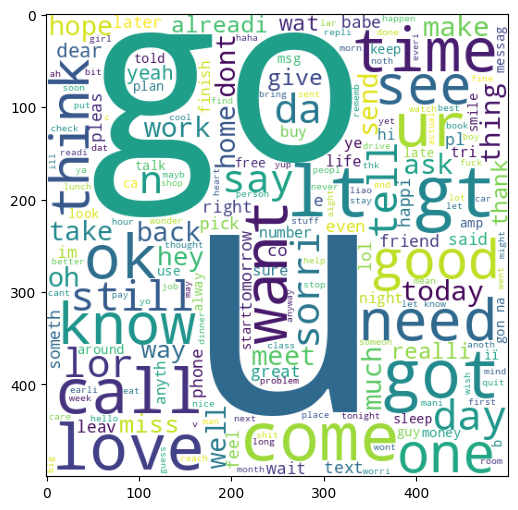

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [50]:
len(spam_corpus)

9939

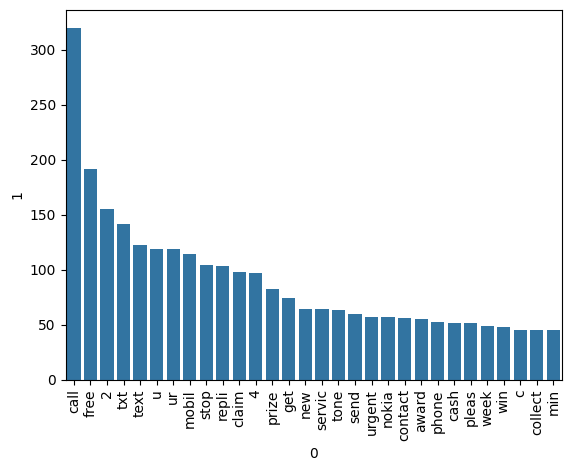

In [51]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

35404

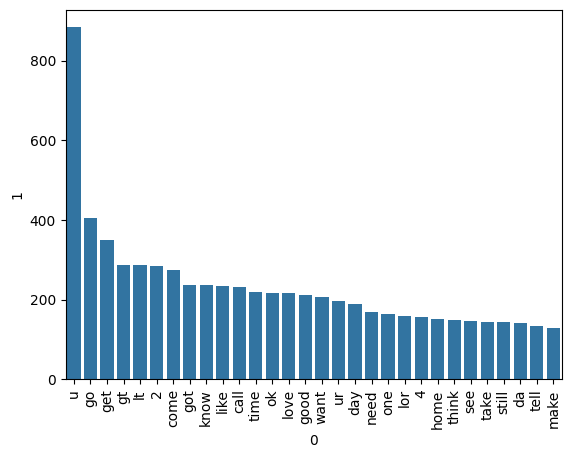

In [54]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. MODEL BUILDING

In [56]:
tfidf = TfidfVectorizer(max_features=3000)

In [57]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [58]:
X.shape

(5169, 3000)

In [59]:
y = df['target'].values

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Implementation of Classifiers Using Built-in Packages**

***Decision Tree Classifier***

Decision Tree Classifier Accuracy: 0.93
              precision    recall  f1-score   support

         ham       0.95      0.98      0.96       889
        spam       0.83      0.66      0.74       145

    accuracy                           0.93      1034
   macro avg       0.89      0.82      0.85      1034
weighted avg       0.93      0.93      0.93      1034

Decision Tree Classifier Precision: 0.83


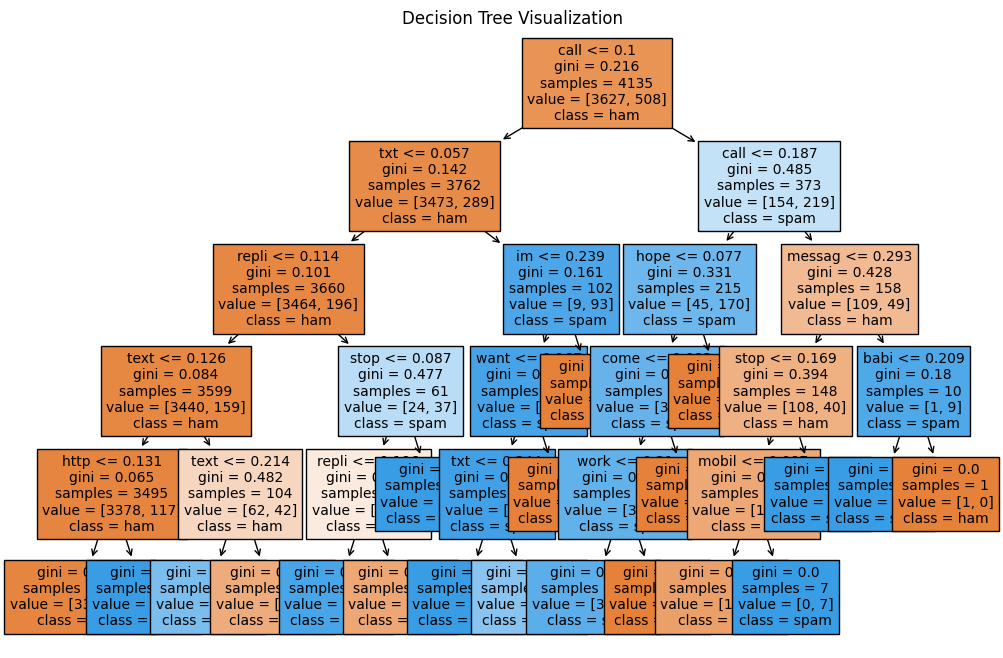

In [62]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Decision Tree Classifier Accuracy: {accuracy_dtc:.2f}")
print(classification_report(y_test, y_pred_dtc, target_names=['ham', 'spam']))
pre_dtc = precision_score(y_test, y_pred_dtc, average='binary')
print(f"Decision Tree Classifier Precision: {pre_dtc:.2f}")

dot_data=tree.export_graphviz(dtc,out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_pdf("tree.pdf")

plt.figure(figsize=(12, 8))
plot_tree(dtc, filled=True, feature_names=tfidf.get_feature_names_out(), class_names=['ham', 'spam'], fontsize=10)
plt.title("Decision Tree Visualization")
plt.savefig('decision_tree.png')
plt.show()


***Gradiant Boosting Classifier***

In [63]:
gdbt = GradientBoostingClassifier()
gdbt.fit(X_train, y_train)
y_pred_gdbt = gdbt.predict(X_test)
accuracy_gdbt = accuracy_score(y_test, y_pred_gdbt)
print(f"Gradient Boosting Classifier Accuracy: { accuracy_gdbt:.2f}")
precision_gdbt = precision_score(y_test, y_pred_gdbt, average='binary')
print(f"Gradient Boosting Classifier Precision: {precision_gdbt:.2f}")
print(classification_report(y_test, y_pred_gdbt, target_names=['ham', 'spam']))


Gradient Boosting Classifier Accuracy: 0.96
Gradient Boosting Classifier Precision: 0.97
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       889
        spam       0.97      0.74      0.84       145

    accuracy                           0.96      1034
   macro avg       0.97      0.87      0.91      1034
weighted avg       0.96      0.96      0.96      1034



***Multinomial Naive Bayes Classifier:***

In [64]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_mnb = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_mnb)
print(f"Built-in Multinomial Accuracy : {accuracy_mnb:.3f}")
precision_mnb = precision_score(y_test, y_mnb, average='binary')
print(f"Multinomial Classifier Precision: {precision_mnb:.2f}")
print(classification_report(y_test, y_mnb, target_names=['ham', 'spam']))

Built-in Multinomial Accuracy : 0.973
Multinomial Classifier Precision: 0.99
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       889
        spam       0.99      0.81      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



**Comparing Accuracies of Builtin Models**

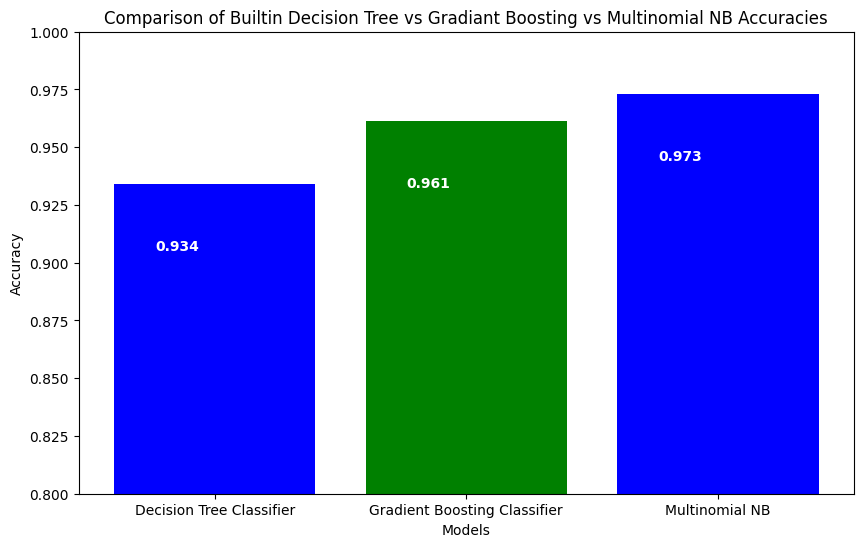

In [65]:
models = ['Decision Tree Classifier','Gradient Boosting Classifier' ,'Multinomial NB']
accuracies = [accuracy_dtc,accuracy_gdbt, accuracy_mnb]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Builtin Decision Tree vs Gradiant Boosting vs Multinomial NB Accuracies')
plt.ylim(0.8, 1.0)
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() - 0.03, f'{accuracy:.3f}', ha='center', va='bottom', color='white', fontweight='bold')

plt.show()

**Comparing Precisions of Builtin Models**

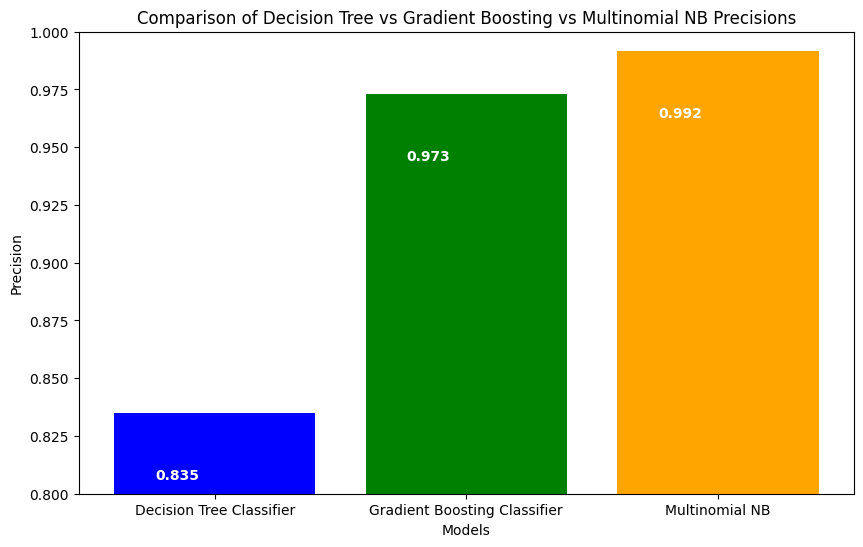

In [66]:
models = ['Decision Tree Classifier', 'Gradient Boosting Classifier', 'Multinomial NB']
precisions = [pre_dtc, precision_gdbt, precision_mnb]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, precisions, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison of Decision Tree vs Gradient Boosting vs Multinomial NB Precisions')
plt.ylim(0.8, 1.0)
for bar, precision in zip(bars, precisions):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() - 0.03, f'{precision:.3f}', ha='center', va='bottom', color='white', fontweight='bold')

plt.show()


We can see that the best algorithm is Multinomial NB as its precision is higher as compared to others

In [67]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

**Without Python Package Implementation of Decision Tree**

In [68]:
class DecisionTree:
    def __init__(self, depth=5):  # Increased depth
        self.depth = depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        if len(set(y)) == 1 or depth == self.depth:
            return Counter(y).most_common(1)[0][0]

        best_feature, best_value = self._best_split(X, y)
        left_indices = X[:, best_feature] <= best_value
        right_indices = X[:, best_feature] > best_value
        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        return (best_feature, best_value, left_tree, right_tree)

    def _best_split(self, X, y):
        best_gain = -1
        best_feature = None
        best_value = None
        for feature in range(X.shape[1]):
            values = set(X[:, feature])
            for value in values:
                left_indices = X[:, feature] <= value
                right_indices = X[:, feature] > value
                gain = self._information_gain(y, y[left_indices], y[right_indices])
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_value = value
        return best_feature, best_value

    def _information_gain(self, y, y_left, y_right):
        p = len(y_left) / len(y)
        return self._entropy(y) - p * self._entropy(y_left) - (1 - p) * self._entropy(y_right)

    def _entropy(self, y):
        counts = np.bincount(y)
        probabilities = counts / len(y)
        return -np.sum([p * math.log2(p) for p in probabilities if p > 0])

    def predict(self, X):
        return np.array([self._predict_one(x, self.tree) for x in X])

    def _predict_one(self, x, tree):
        if not isinstance(tree, tuple):
            return tree
        feature, value, left_tree, right_tree = tree
        if x[feature] <= value:
            return self._predict_one(x, left_tree)
        else:
            return self._predict_one(x, right_tree)

# Train the model
model = DecisionTree(depth=5)  # Increased depth
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, predictions, target_names=['ham', 'spam']))
precision = precision_score(y_test, predictions, average='binary')
print(f"Precision: {precision:.2f}")

Accuracy: 0.94
              precision    recall  f1-score   support

         ham       0.95      0.98      0.96       889
        spam       0.84      0.66      0.74       145

    accuracy                           0.94      1034
   macro avg       0.89      0.82      0.85      1034
weighted avg       0.93      0.94      0.93      1034

Precision: 0.84


**Without Python Package Implementation of Gradient Boosting Classifier**

In [69]:
class GradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []

    def fit(self, X, y):
        # Initialize with the mean of y
        self.models.append(np.mean(y))
        y_pred = np.full_like(y, self.models[0], dtype=np.float64)

        for i in range(self.n_estimators):
            # Compute residuals
            residuals = y - y_pred

            # Fit a decision tree regressor to residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)

            # Update predictions
            update = self.learning_rate * tree.predict(X)
            y_pred += update

            # Store the model
            self.models.append(tree)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.models[0], dtype=np.float64)
        for tree in self.models[1:]:
            y_pred += self.learning_rate * tree.predict(X)
        return (y_pred > 0.5).astype(int)

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

gb_classifier.fit(X_train, y_train)

y_pred_test = gb_classifier.predict(X_test)
test_precision = precision_score(y_test, y_pred_test, average='binary')
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {test_accuracy:.2f}")
print(classification_report(y_test, y_pred_test, target_names=['ham', 'spam']))
print(f"Precision: {test_precision:.2f}")

Accuracy: 0.96
              precision    recall  f1-score   support

         ham       0.96      0.99      0.98       889
        spam       0.96      0.76      0.85       145

    accuracy                           0.96      1034
   macro avg       0.96      0.88      0.91      1034
weighted avg       0.96      0.96      0.96      1034

Precision: 0.96


**Without Python Package Implementation of Multinomial Naive Bayes Classifier**

In [70]:
class MultiNB:
    def __init__(self,alpha=1):
        self.alpha = alpha

    def _prior(self):
        P = np.zeros((self.n_classes_))
        _, self.dist = np.unique(self.y,return_counts=True)
        for i in range(self.classes_.shape[0]):
            P[i] = self.dist[i] / self.n_samples
        return P

    def fit(self, X, y):

        self.y = y
        self.n_samples, self.n_features = X.shape
        self.classes_ = np.unique(y)
        self.n_classes_ = self.classes_.shape[0]
        self.class_priors_ = self._prior()

        # distinct values in each features
        self.uniques = []
        for i in range(self.n_features):
            tmp = np.unique(X[:,i])
            self.uniques.append( tmp )

        self.N_yi = np.zeros((self.n_classes_, self.n_features)) # feature count
        self.N_y = np.zeros((self.n_classes_)) # total count
        for i in self.classes_: # x axis
            indices = np.argwhere(self.y==i).flatten()
            columnwise_sum = []
            for j in range(self.n_features): # y axis
                columnwise_sum.append(np.sum(X[indices,j]))

            self.N_yi[i] = columnwise_sum # 2d
            self.N_y[i] = np.sum(columnwise_sum) # 1d

    def _theta(self, x_i, i, h):

        Nyi = self.N_yi[h,i]
        Ny  = self.N_y[h]

        numerator = Nyi + self.alpha
        denominator = Ny + (self.alpha * self.n_features)

        return  (numerator / denominator)**x_i

    def _likelyhood(self, x, h):
        tmp = []
        for i in range(x.shape[0]):
            tmp.append(self._theta(x[i], i,h))

        return np.prod(tmp)

    def predict(self, X):
        samples, features = X.shape
        self.predict_proba = np.zeros((samples,self.n_classes_))

        for i in range(X.shape[0]):
            joint_likelyhood = np.zeros((self.n_classes_))

            for h in range(self.n_classes_):
                joint_likelyhood[h]  = self.class_priors_[h] * self._likelyhood(X[i],h) # P(y) P(X|y)

            denominator = np.sum(joint_likelyhood)

            for h in range(self.n_classes_):
                numerator = joint_likelyhood[h]
                self.predict_proba[i,h] = (numerator / denominator)

        indices = np.argmax(self.predict_proba,axis=1)
        return self.classes_[indices]
clf = MultinomialNB(alpha=1)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
accuracy_mn = accuracy_score(y_test, y_predict)
precision_mn = precision_score(y_test, y_predict, average='binary')
print(f" Custom Multinomial Accuracy : {accuracy_mn:.2f}")
print(f"Custom Multinomial NB Precision: {precision_mn:.2f}")
print(classification_report(y_test, y_predict, target_names=['ham', 'spam']))

 Custom Multinomial Accuracy : 0.97
Custom Multinomial NB Precision: 0.99
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       889
        spam       0.99      0.81      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



**Comparing Accuracies of Without Python Package Models**

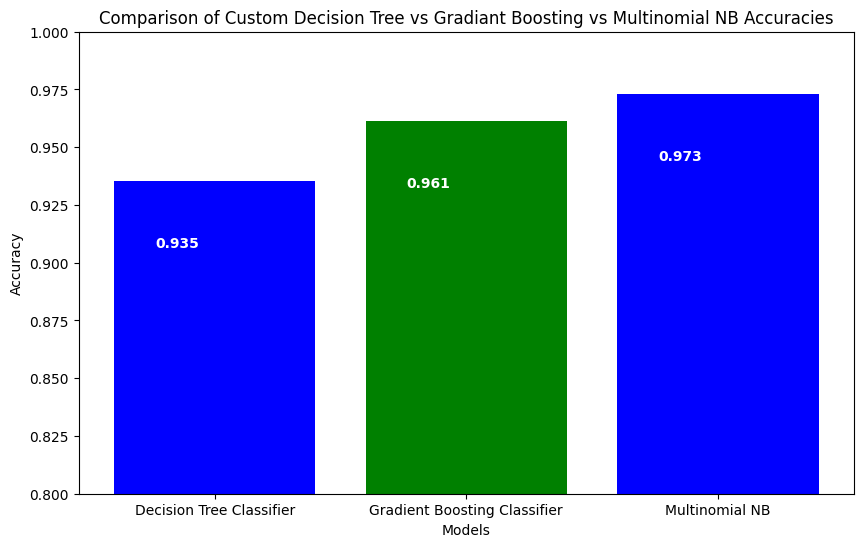

In [71]:
models = ['Decision Tree Classifier','Gradient Boosting Classifier' ,'Multinomial NB']
accuracies = [accuracy,test_accuracy, accuracy_mn]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Custom Decision Tree vs Gradiant Boosting vs Multinomial NB Accuracies')
plt.ylim(0.8, 1.0)
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() - 0.03, f'{accuracy:.3f}', ha='center', va='bottom', color='white', fontweight='bold')

plt.show()

**Comparing Precisions of Without Python Package Models**

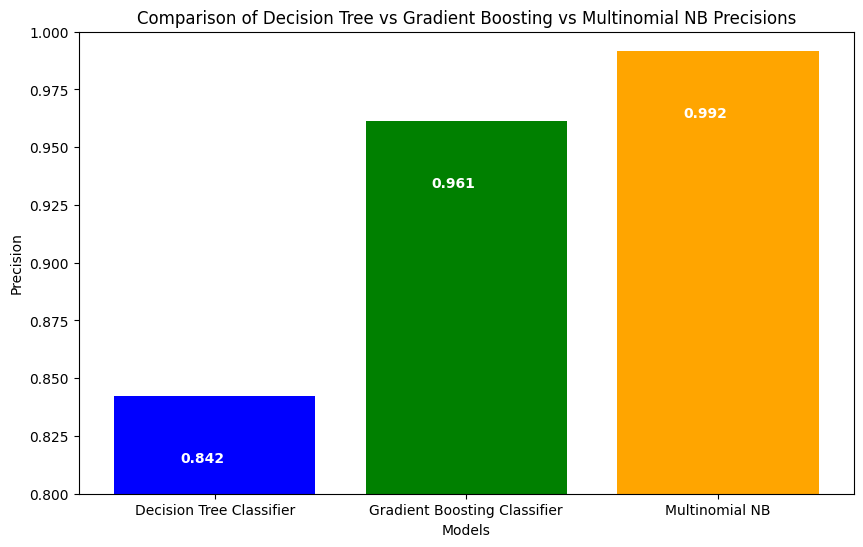

In [72]:
models = ['Decision Tree Classifier', 'Gradient Boosting Classifier', 'Multinomial NB']
precisions = [precision, test_accuracy, precision_mn]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, precisions, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison of Decision Tree vs Gradient Boosting vs Multinomial NB Precisions')
plt.ylim(0.8, 1.0)
for bar, precision in zip(bars, precisions):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() - 0.03, f'{precision:.3f}', ha='center', va='bottom', color='white', fontweight='bold')

plt.show()

In [73]:
# We can see that the best algorithm is Multinomial NB as its precision is higher as compared to others

**Validation Example**

In [74]:
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))

def predict_spam(input_text):
    transformed_text = vectorizer.transform([input_text])
    prediction = model.predict(transformed_text)
    label = 'spam' if prediction[0] == 1 else 'ham'

    return label

example_sentence = "Congratulations! You've won a free vacation for two! Claim your prize now by calling 555-789-0123. Hurry, this offer won't last!"
result = predict_spam(example_sentence)
print(f"The message is classified as: {result}")


The message is classified as: spam
